In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [28]:
df = pd.read_csv('data/students_simple.csv')
df

,height,mass,income,iq,pages,age,bmi,work_exp,friends,test_time
0,159,45,430,95,24,20,3.533,26,5,8.5
1,160,61,640,115,32,25,2.623,63,7,6.2
2,161,56,610,111,24,28,2.875,94,10,6.8
3,162,48,330,97,24,19,3.375,16,4,12.0
4,162,54,420,105,60,23,3.000,49,2,7.5
5,164,58,290,98,16,20,2.828,14,6,10.0
6,166,51,480,109,90,26,3.255,78,9,7.2
7,169,62,610,120,24,19,2.726,10,5,4.2
8,170,70,840,122,48,30,2.429,130,10,3.5
9,170,72,330,92,24,20,2.361,20,3,9.5


In [29]:
N = 18

index_1 = N % 5
index_2 = (N ** 2) % 5 + 5

cols = df.columns.tolist()

name_1 = cols[index_1]
name_2 = cols[index_2]

col_1 = df[name_1]
col_2 = df[name_2]

print('Column 1: ', name_1)
print('Column 2: ', name_2)

Column 1:  iq
Column 2:  test_time


### Задание 1

In [30]:
def print_stats(feat):
    """
    Полная функция для расчета статистических характеристик и построения графиков
    """
    print("="*60)
    print(f"СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ для {feat.name}")
    print("="*60)
    
    print(f"Минимум:                    {feat.min():.4f}")
    print(f"Максимум:                   {feat.max():.4f}")
    print(f"Среднее:                    {feat.mean():.4f}")
    print(f"Дисперсия:                  {feat.var():.4f}")
    print(f"Медиана:                    {feat.median():.4f}")
    
    mode_values = feat.mode()
    if len(mode_values) > 0:
        print(f"Мода:                       {mode_values.iloc[0]:.4f}")
    else:
        print(f"Мода:                       отсутствует")
    
    q25 = feat.quantile(0.25)
    q50 = feat.quantile(0.50)
    q75 = feat.quantile(0.75)
    
    print(f"Квантиль 0.25:              {q25:.4f}")
    print(f"Квантиль 0.50 (медиана):    {q50:.4f}")
    print(f"Квантиль 0.75:              {q75:.4f}")
    
    iqr = q75 - q25
    print(f"Интерквартильный размах:    {iqr:.4f}")
    
    print(f"Эксцесс (kurtosis):         {feat.kurtosis():.4f}")
    print(f"Асимметрия (skew):          {feat.skew():.4f}")
    
    print("\n" + "="*60)
    print("ГРАФИКИ")
    print("="*60)
    
    num_bins = int(np.log2(feat.size) + 1)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    ax1.hist(feat, bins=num_bins, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.set_title(f'Гистограмма: {feat.name}')
    ax1.set_xlabel('Значения')
    ax1.set_ylabel('Частота')
    ax1.grid(True, alpha=0.3)
    
    ax1.axvline(feat.mean(), color='red', linestyle='--', label=f'Среднее: {feat.mean():.2f}')
    ax1.axvline(feat.median(), color='green', linestyle='--', label=f'Медиана: {feat.median():.2f}')
    ax1.legend()
    
    sorted_data = np.sort(feat.dropna())
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    ax2.step(sorted_data, y_values, where='post', color='darkblue', linewidth=2)
    ax2.set_title(f'Эмпирическая функция распределения: {feat.name}')
    ax2.set_xlabel('Значения')
    ax2.set_ylabel('Вероятность P(X ≤ x)')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 1)
    
    ax2.axvline(q25, color='orange', linestyle=':', label=f'Q1: {q25:.2f}')
    ax2.axvline(q50, color='green', linestyle=':', label=f'Q2: {q50:.2f}')
    ax2.axvline(q75, color='red', linestyle=':', label=f'Q3: {q75:.2f}')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ для iq
Минимум:                    92.0000
Максимум:                   128.0000
Среднее:                    107.4000
Дисперсия:                  88.2526
Медиана:                    105.5000
Мода:                       104.0000
Квантиль 0.25:              101.5000
Квантиль 0.50 (медиана):    105.5000
Квантиль 0.75:              112.0000
Интерквартильный размах:    10.5000
Эксцесс (kurtosis):         -0.1413
Асимметрия (skew):          0.4980

ГРАФИКИ


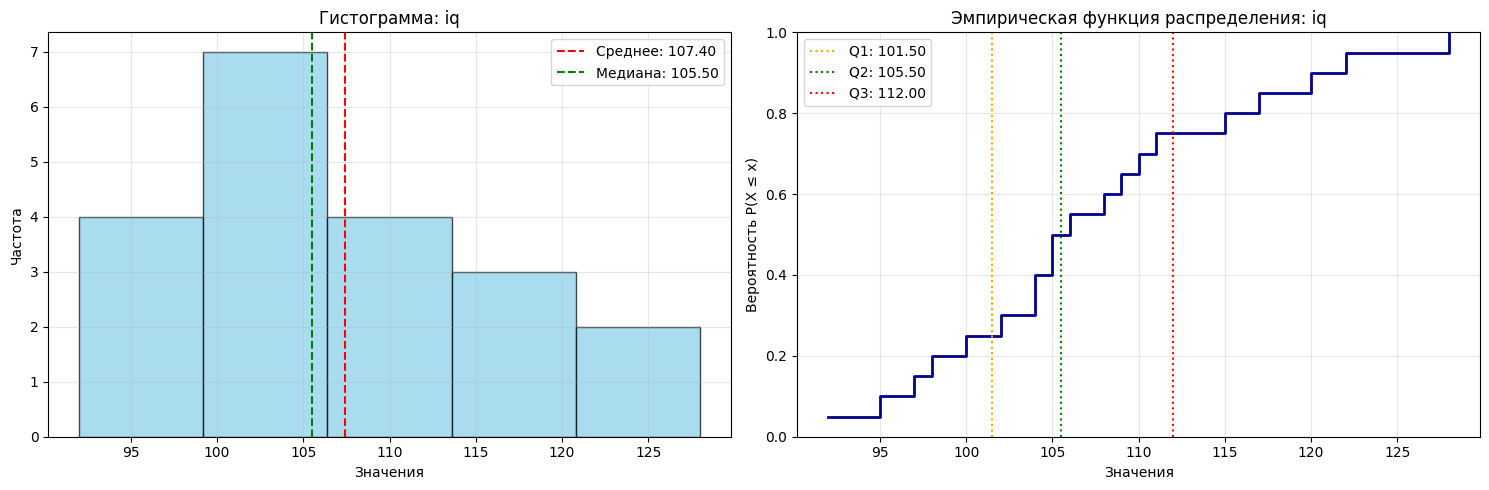

In [31]:
print_stats(col_1)

СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ для test_time
Минимум:                    3.5000
Максимум:                   12.5000
Среднее:                    7.7300
Дисперсия:                  6.3654
Медиана:                    7.6500
Мода:                       10.0000
Квантиль 0.25:              6.1500
Квантиль 0.50 (медиана):    7.6500
Квантиль 0.75:              9.6250
Интерквартильный размах:    3.4750
Эксцесс (kurtosis):         -0.6003
Асимметрия (skew):          0.1733

ГРАФИКИ


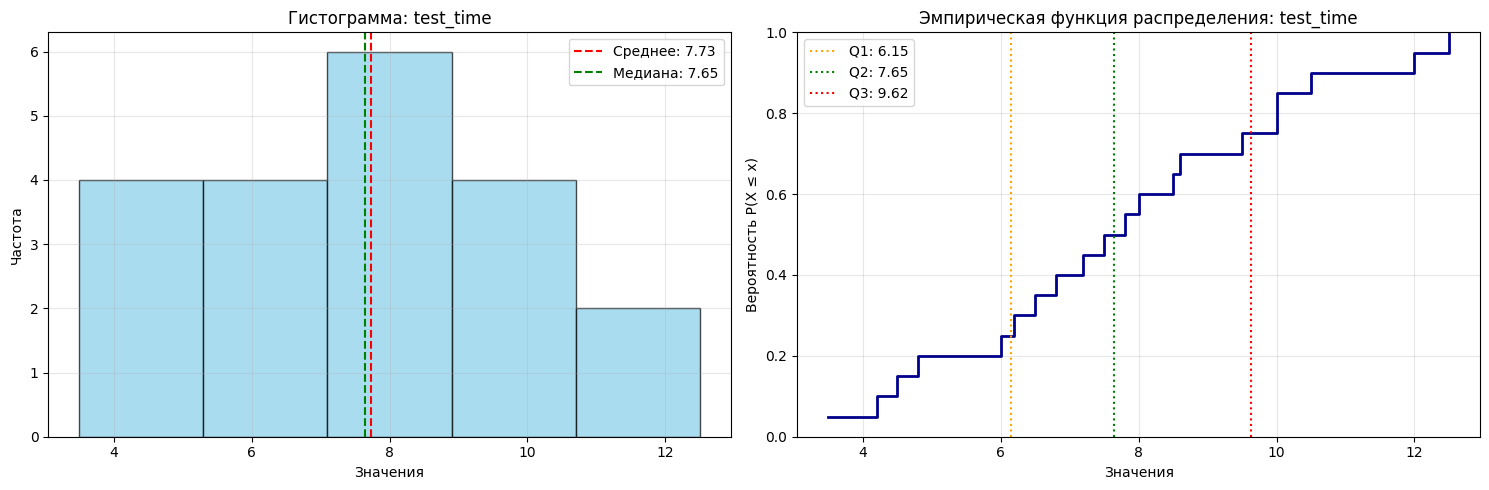

In [32]:
print_stats(col_2)

In [33]:
print('NaN in col_1: ', col_1.isna().sum())
print('NaN in col_2: ', col_2.isna().sum())

NaN in col_1:  0
NaN in col_2:  0


Из гистограмм распределения обеих случайных величин (столбцов) видно, что они не напоминают ни одно из "классических" распределений. Визуально не похожи на нормальное распределение, потому проверять это посредством аналитических критериев считаю излишним. Тем более, что на последующтй корреляционный анализ это бы сильно не повлияло

### Задание 2


#### Коэффициент Фехнера

Пусть $C$ — число пар с одинаковыми знаками отклонений от медиан, $D$ — с разными. Тогда:
$$
r_F = \frac{C - D}{C + D}
$$


#### Коэффициент Пирсона

$$
r_P = \frac{\sum\limits_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum\limits_{i=1}^{n}(x_i - \bar{x})^2} \sqrt{\sum\limits_{i=1}^{n}(y_i - \bar{y})^2}}
$$

#### Коэффициент Спирмена (при отсутствии связанных рангов)

$$
\rho = 1 - \frac{6 \sum\limits_{i=1}^{n} d_i^2}{n(n^2 - 1)}, \quad d_i = R(x_i) - R(y_i)
$$


#### Коэффициент Кенделла

Пара наблюдений $(x_i, y_i)$ и $(x_j, y_j)$ называется:

- согласованной, если $(x_i - x_j)(y_i - y_j) > 0$,
- несогласованной, если $(x_i - x_j)(y_i - y_j) < 0$.

Пусть $C$ — число согласованных пар, $D$ — число несоглавсованных пар. Тогда:

$$
\tau = \frac{2(C - D)}{n(n - 1)}
$$

In [ ]:
valid_indices = ~(col_1.isna() | col_2.isna()) # в целом, для данных столбцов не нужно, но пусть будет
x = col_1[valid_indices].values
y = col_2[valid_indices].values
n = len(x)

print("="*70)
print("КОРРЕЛЯЦИОННЫЙ АНАЛИЗ")
print("="*70)
print(f"Признак 1: {col_1.name}")
print(f"Признак 2: {col_2.name}")
print(f"Количество наблюдений: {n}")
print("="*70)

# 1. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ ФЕХНЕРА
print("\n1. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ ФЕХНЕРА")
print("-"*70)

x_mean = np.mean(x)
y_mean = np.mean(y)

sign_x = np.sign(x - x_mean)
sign_y = np.sign(y - y_mean)

matches = np.sum(sign_x * sign_y > 0)
mismatches = np.sum(sign_x * sign_y < 0)

# Коэффициент Фехнера
fechner = (matches - mismatches) / (matches + mismatches)

print(f"Среднее значение {col_1.name}: {x_mean:.4f}")
print(f"Среднее значение {col_2.name}: {y_mean:.4f}")
print(f"Количество совпадающих знаков: {matches}")
print(f"Количество несовпадающих знаков: {mismatches}")
print(f"Коэффициент корреляции Фехнера: {fechner:.4f}")

# 2. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ ПИРСОНА + ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ
print("\n2. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ ПИРСОНА")
print("-"*70)

pearson_r, pearson_p = stats.pearsonr(x, y)

print(f"Коэффициент корреляции Пирсона: {pearson_r:.4f}")
print(f"P-значение: {pearson_p:.6f}")

alpha = 0.05
z = np.arctanh(pearson_r)
se = 1 / np.sqrt(n - 3)
z_critical = stats.norm.ppf(1 - alpha/2)

ci_lower_z = z - z_critical * se
ci_upper_z = z + z_critical * se

ci_lower = np.tanh(ci_lower_z)
ci_upper = np.tanh(ci_upper_z)

print(f"95% доверительный интервал: [{ci_lower:.4f}, {ci_upper:.4f}]")

if pearson_p < 0.05:
    print("Корреляция статистически значима на уровне 5%")
else:
    print("Корреляция статистически незначима на уровне 5%")

# 3. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ СПИРМЕНА
print("\n3. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ СПИРМЕНА")
print("-"*70)

spearman_r, spearman_p = stats.spearmanr(x, y)

print(f"Коэффициент корреляции Спирмена: {spearman_r:.4f}")
print(f"P-значение: {spearman_p:.6f}")

if spearman_p < 0.05:
    print("Корреляция статистически значима на уровне 5%")
else:
    print("Корреляция статистически незначима на уровне 5%")

# 4. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ КЕНДЕЛЛА (TAU)
print("\n4. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ КЕНДЕЛЛА")
print("-"*70)

kendall_tau, kendall_p = stats.kendalltau(x, y)

print(f"Коэффициент корреляции Кенделла (tau): {kendall_tau:.4f}")
print(f"P-значение: {kendall_p:.6f}")

if kendall_p < 0.05:
    print("Корреляция статистически значима на уровне 5%")
else:
    print("Корреляция статистически незначима на уровне 5%")

# СВОДНАЯ ТАБЛИЦА
print("\n" + "="*70)
print("СВОДНАЯ ТАБЛИЦА КОЭФФИЦИЕНТОВ КОРРЕЛЯЦИИ")
print("="*70)

correlation_summary = pd.DataFrame({
    'Метод': ['Фехнер', 'Пирсон', 'Спирмен', 'Кенделл'],
    'Коэффициент': [fechner, pearson_r, spearman_r, kendall_tau],
    'P-значение': [np.nan, pearson_p, spearman_p, kendall_p],
    'Значима (α=0.05)': ['-', 
                          'Да' if pearson_p < 0.05 else 'Нет',
                          'Да' if spearman_p < 0.05 else 'Нет',
                          'Да' if kendall_p < 0.05 else 'Нет']
})

print(correlation_summary.to_string(index=False))
print("="*70)


КОРРЕЛЯЦИОННЫЙ АНАЛИЗ
Признак 1: iq
Признак 2: test_time
Количество наблюдений: 20

1. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ ФЕХНЕРА
----------------------------------------------------------------------
Среднее значение iq: 107.4000
Среднее значение test_time: 7.7300
Количество совпадающих знаков: 3
Количество несовпадающих знаков: 17
Коэффициент корреляции Фехнера: -0.7000

2. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ ПИРСОНА
----------------------------------------------------------------------
Коэффициент корреляции Пирсона: -0.6818
P-значение: 0.000930
95% доверительный интервал: [-0.8637, -0.3427]
Корреляция статистически значима на уровне 5%

3. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ СПИРМЕНА
----------------------------------------------------------------------
Коэффициент корреляции Спирмена: -0.6823
P-значение: 0.000918
Корреляция статистически значима на уровне 5%

4. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ КЕНДЕЛЛА
----------------------------------------------------------------------
Коэффициент корреляции Кенделла (tau): -0.5040
P-значен

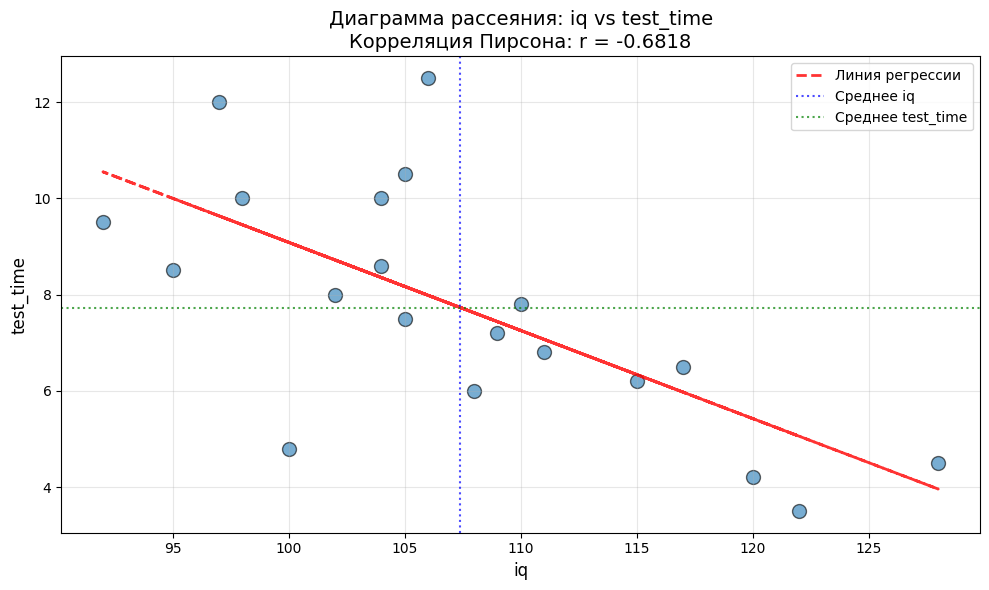

In [35]:
# Визуализация корреляции
fig, ax = plt.subplots(figsize=(10, 6))

# Диаграмма рассеяния
ax.scatter(x, y, alpha=0.6, s=100, edgecolors='black', linewidth=1)

# Линия регрессии для наглядности
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x, p(x), "r--", alpha=0.8, linewidth=2, label=f'Линия регрессии')

# Средние линии
ax.axvline(x_mean, color='blue', linestyle=':', alpha=0.7, label=f'Среднее {col_1.name}')
ax.axhline(y_mean, color='green', linestyle=':', alpha=0.7, label=f'Среднее {col_2.name}')

ax.set_xlabel(col_1.name, fontsize=12)
ax.set_ylabel(col_2.name, fontsize=12)
ax.set_title(f'Диаграмма рассеяния: {col_1.name} vs {col_2.name}\n' + 
             f'Корреляция Пирсона: r = {pearson_r:.4f}', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

print("="*70)
print("РЕГРЕССИОННЫЙ АНАЛИЗ")
print("="*70)
print(f"Независимая переменная (X): {col_1.name}")
print(f"Зависимая переменная (Y): {col_2.name}")
print("="*70)

X = x.reshape(-1, 1)
Y = y.reshape(-1, 1)

# Создаем диапазон для предсказаний (плавная линия)
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

# Словарь для хранения результатов
results = {}

# ============================================================================
# 1. ЛИНЕЙНАЯ РЕГРЕССИЯ: y = w1*x + w0
# ============================================================================
print("\n1. ЛИНЕЙНАЯ РЕГРЕССИЯ: y = w1*x + w0")
print("-"*70)

linear_model = LinearRegression()
linear_model.fit(X, Y)
y_pred_linear = linear_model.predict(X)
y_range_linear = linear_model.predict(x_range)

w0_linear = linear_model.intercept_[0]
w1_linear = linear_model.coef_[0][0]

r2_linear = r2_score(Y, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(Y, y_pred_linear))
mae_linear = mean_absolute_error(Y, y_pred_linear)

print(f"Уравнение: y = {w1_linear:.4f}*x + {w0_linear:.4f}")
print(f"Коэффициент детерминации R²: {r2_linear:.4f}")
print(f"Среднеквадратичная ошибка RMSE: {rmse_linear:.4f}")
print(f"Среднее абсолютное отклонение MAE: {mae_linear:.4f}")
results['Линейная'] = {
    'model': linear_model,
    'y_pred': y_pred_linear,
    'y_range': y_range_linear,
    'equation': f"y = {w1_linear:.4f}*x + {w0_linear:.4f}",
    'r2': r2_linear,
    'rmse': rmse_linear,
    'mae': mae_linear
}

# ============================================================================
# 2. КВАДРАТИЧНАЯ РЕГРЕССИЯ: y = w2*x^2 + w1*x + w0
# ============================================================================
print("\n2. КВАДРАТИЧНАЯ РЕГРЕССИЯ: y = w2*x² + w1*x + w0")
print("-"*70)

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
x_range_poly = poly_features.transform(x_range)

quadratic_model = LinearRegression()
quadratic_model.fit(X_poly, Y)
y_pred_quadratic = quadratic_model.predict(X_poly)
y_range_quadratic = quadratic_model.predict(x_range_poly)

w0_quadratic = quadratic_model.intercept_[0]
w1_quadratic = quadratic_model.coef_[0][1]
w2_quadratic = quadratic_model.coef_[0][2]

r2_quadratic = r2_score(Y, y_pred_quadratic)
rmse_quadratic = np.sqrt(mean_squared_error(Y, y_pred_quadratic))
mae_quadratic = mean_absolute_error(Y, y_pred_quadratic)

print(f"Уравнение: y = {w2_quadratic:.4f}*x² + {w1_quadratic:.4f}*x + {w0_quadratic:.4f}")
print(f"Коэффициент детерминации R²: {r2_quadratic:.4f}")
print(f"Среднеквадратичная ошибка RMSE: {rmse_quadratic:.4f}")
print(f"Среднее абсолютное отклонение MAE: {mae_quadratic:.4f}")

results['Квадратичная'] = {
    'model': quadratic_model,
    'y_pred': y_pred_quadratic,
    'y_range': y_range_quadratic,
    'equation': f"y = {w2_quadratic:.4f}*x² + {w1_quadratic:.4f}*x + {w0_quadratic:.4f}",
    'r2': r2_quadratic,
    'rmse': rmse_quadratic,
    'mae': mae_quadratic
}

# ============================================================================
# 3. ГИПЕРБОЛИЧЕСКАЯ РЕГРЕССИЯ: y = w1/x + w0
# ============================================================================
print("\n3. ГИПЕРБОЛИЧЕСКАЯ РЕГРЕССИЯ: y = w1/x + w0")
print("-"*70)

# Преобразуем x в 1/x
X_hyperbolic = 1 / X
x_range_hyperbolic = 1 / x_range

hyperbolic_model = LinearRegression()
hyperbolic_model.fit(X_hyperbolic, Y)
y_pred_hyperbolic = hyperbolic_model.predict(X_hyperbolic)
y_range_hyperbolic = hyperbolic_model.predict(x_range_hyperbolic)

w0_hyperbolic = hyperbolic_model.intercept_[0]
w1_hyperbolic = hyperbolic_model.coef_[0][0]

r2_hyperbolic = r2_score(Y, y_pred_hyperbolic)
rmse_hyperbolic = np.sqrt(mean_squared_error(Y, y_pred_hyperbolic))
mae_hyperbolic = mean_absolute_error(Y, y_pred_hyperbolic)

print(f"Уравнение: y = {w1_hyperbolic:.4f}/x + {w0_hyperbolic:.4f}")
print(f"Коэффициент детерминации R²: {r2_hyperbolic:.4f}")
print(f"Среднеквадратичная ошибка RMSE: {rmse_hyperbolic:.4f}")
print(f"Среднее абсолютное отклонение MAE: {mae_hyperbolic:.4f}")

results['Гиперболическая'] = {
    'model': hyperbolic_model,
    'y_pred': y_pred_hyperbolic,
    'y_range': y_range_hyperbolic,
    'equation': f"y = {w1_hyperbolic:.4f}/x + {w0_hyperbolic:.4f}",
    'r2': r2_hyperbolic,
    'rmse': rmse_hyperbolic,
    'mae': mae_hyperbolic
}

# ============================================================================
# 4. ПОКАЗАТЕЛЬНАЯ РЕГРЕССИЯ: y = w0 * w1^x
# ============================================================================
print("\n4. ПОКАЗАТЕЛЬНАЯ РЕГРЕССИЯ: y = w0 * w1^x")
print("-"*70)

# Для показательной регрессии используем логарифмическое преобразование
# log(y) = log(w0) + x*log(w1)
# Это линейная регрессия в логарифмическом масштабе

# Проверяем, что все значения y положительные
if np.all(Y > 0):
    Y_log = np.log(Y)
    
    exponential_model = LinearRegression()
    exponential_model.fit(X, Y_log)
    y_log_pred = exponential_model.predict(X)
    y_range_log_pred = exponential_model.predict(x_range)
    
    # Преобразуем обратно из логарифмического масштаба
    y_pred_exponential = np.exp(y_log_pred)
    y_range_exponential = np.exp(y_range_log_pred)
    
    # Вычисляем коэффициенты
    log_w0 = exponential_model.intercept_[0]
    log_w1 = exponential_model.coef_[0][0]
    
    w0_exponential = np.exp(log_w0)
    w1_exponential = np.exp(log_w1)
    
    r2_exponential = r2_score(Y, y_pred_exponential)
    rmse_exponential = np.sqrt(mean_squared_error(Y, y_pred_exponential))
    mae_exponential = mean_absolute_error(Y, y_pred_exponential)
    
    print(f"Уравнение: y = {w0_exponential:.4f} * {w1_exponential:.4f}^x")
    print(f"Коэффициент детерминации R²: {r2_exponential:.4f}")
    print(f"Среднеквадратичная ошибка RMSE: {rmse_exponential:.4f}")
    print(f"Среднее абсолютное отклонение MAE: {mae_exponential:.4f}")

    results['Показательная'] = {
        'model': exponential_model,
        'y_pred': y_pred_exponential,
        'y_range': y_range_exponential,
        'equation': f"y = {w0_exponential:.4f} * {w1_exponential:.4f}^x",
        'r2': r2_exponential,
        'rmse': rmse_exponential,
        'mae': mae_exponential
    }
else:
    print("ПРЕДУПРЕЖДЕНИЕ: Показательная регрессия требует положительных значений Y")
    results['Показательная'] = None

# ============================================================================
# СВОДНАЯ ТАБЛИЦА
# ============================================================================
print("\n" + "="*70)
print("СВОДНАЯ ТАБЛИЦА МОДЕЛЕЙ РЕГРЕССИИ")
print("="*70)

summary_data = []
for model_name, result in results.items():
    if result is not None:
        summary_data.append({
            'Модель': model_name,
            'R² (коэф. детерминации)': f"{result['r2']:.4f}",
            'RMSE': f"{result['rmse']:.4f}",
            'MAE': f"{result['mae']:.4f}",
            'Уравнение': result['equation']
        })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))
print("="*70)

# Определяем лучшую модель
best_model_name = max(
    [(name, res['r2']) for name, res in results.items() if res is not None],
    key=lambda x: x[1]
)[0]
print(f"\nЛучшая модель по R²: {best_model_name}")
print("="*70)


РЕГРЕССИОННЫЙ АНАЛИЗ
Независимая переменная (X): iq
Зависимая переменная (Y): test_time

1. ЛИНЕЙНАЯ РЕГРЕССИЯ: y = w1*x + w0
----------------------------------------------------------------------
Уравнение: y = -0.1831*x + 27.3961
Коэффициент детерминации R²: 0.4649
Среднеквадратичная ошибка RMSE: 1.7989
Среднее абсолютное отклонение MAE: 1.3269

2. КВАДРАТИЧНАЯ РЕГРЕССИЯ: y = w2*x² + w1*x + w0
----------------------------------------------------------------------
Уравнение: y = -0.0033*x² + 0.5396*x + -11.8827
Коэффициент детерминации R²: 0.4825
Среднеквадратичная ошибка RMSE: 1.7690
Среднее абсолютное отклонение MAE: 1.3223

3. ГИПЕРБОЛИЧЕСКАЯ РЕГРЕССИЯ: y = w1/x + w0
----------------------------------------------------------------------
Уравнение: y = 2091.8740/x + -11.8859
Коэффициент детерминации R²: 0.4410
Среднеквадратичная ошибка RMSE: 1.8386
Среднее абсолютное отклонение MAE: 1.3337

4. ПОКАЗАТЕЛЬНАЯ РЕГРЕССИЯ: y = w0 * w1^x
---------------------------------------------------

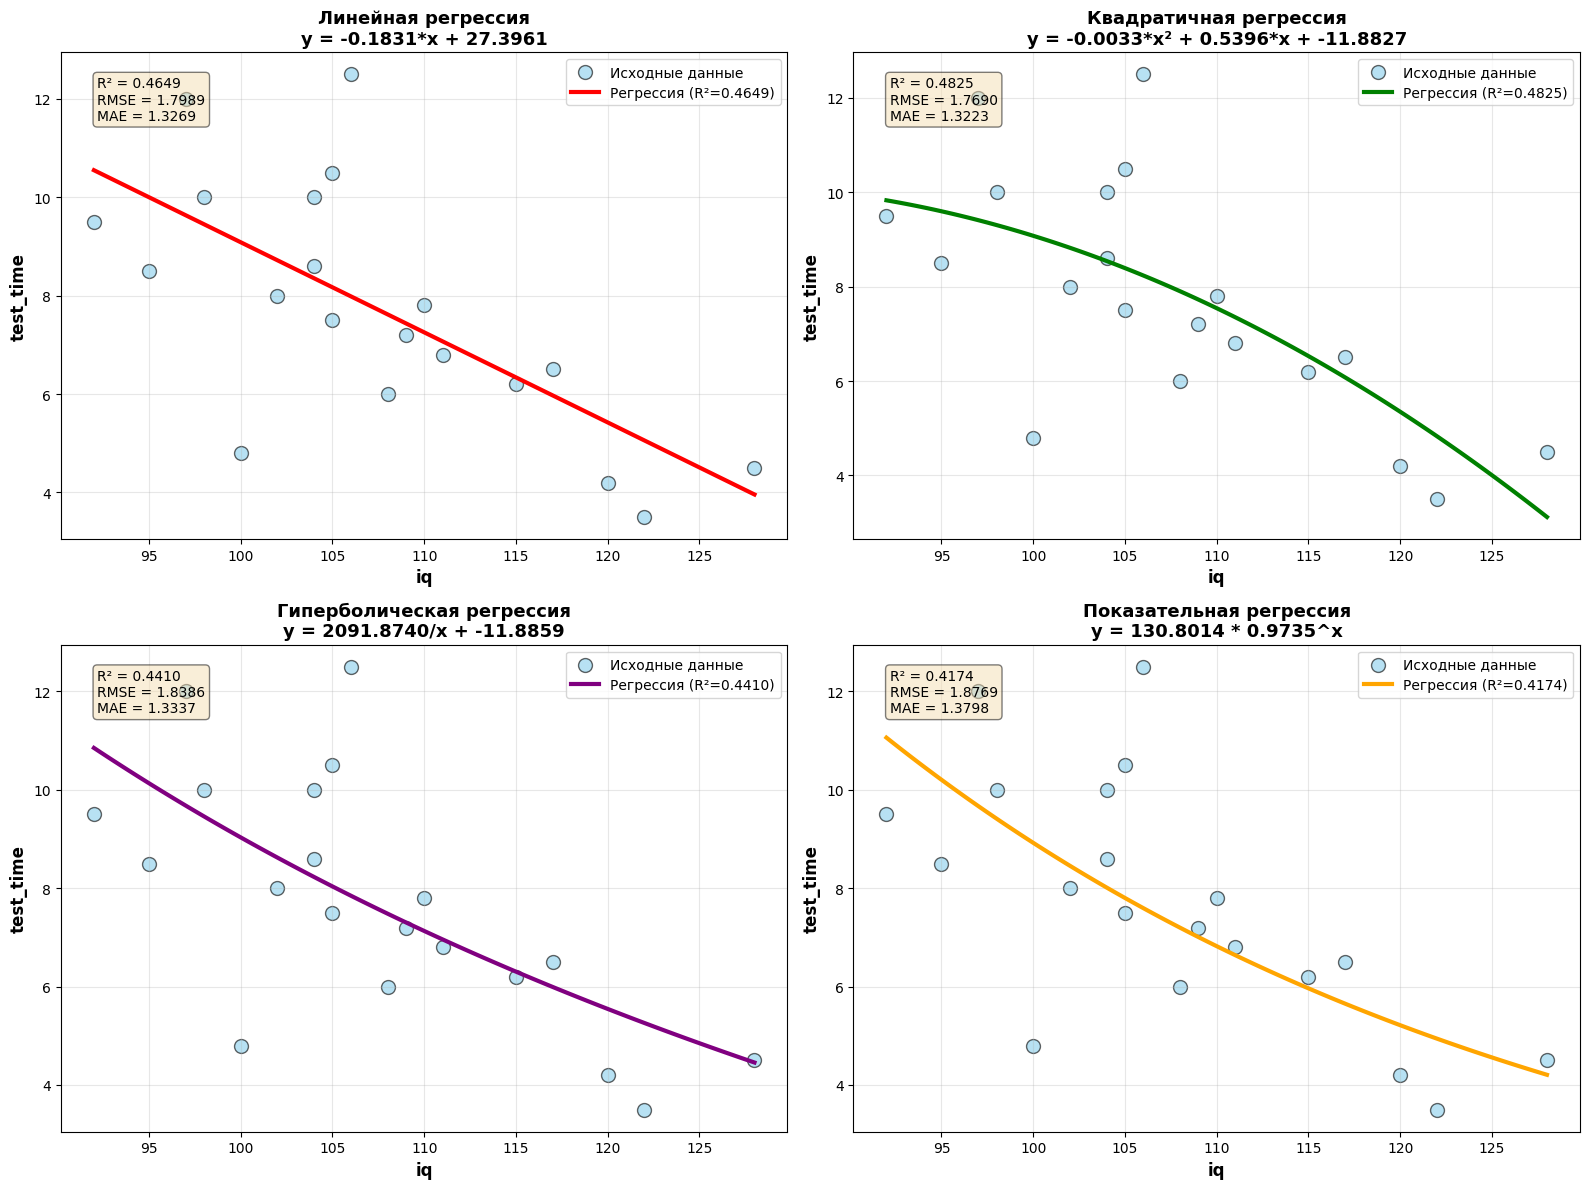

In [37]:
# Визуализация всех моделей регрессии
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

colors = ['red', 'green', 'purple', 'orange']
model_names = list(results.keys())

for idx, (model_name, color) in enumerate(zip(model_names, colors)):
    ax = axes[idx]
    
    # Проверяем, что модель построена
    if results[model_name] is not None:
        result = results[model_name]
        
        # Исходные данные
        ax.scatter(x, y, alpha=0.6, s=100, edgecolors='black', 
                   linewidth=1, label='Исходные данные', color='skyblue')
        
        # Линия регрессии
        ax.plot(x_range, result['y_range'], color=color, linewidth=3, 
                label=f'Регрессия (R²={result["r2"]:.4f})')
        
        # Оформление
        ax.set_xlabel(col_1.name, fontsize=12, fontweight='bold')
        ax.set_ylabel(col_2.name, fontsize=12, fontweight='bold')
        ax.set_title(f'{model_name} регрессия\n{result["equation"]}', 
                     fontsize=13, fontweight='bold')
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3)
        
        # Добавляем текст с метриками
        textstr = f'R² = {result["r2"]:.4f}\nRMSE = {result["rmse"]:.4f}\nMAE = {result["mae"]:.4f}'
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
    else:
        ax.text(0.5, 0.5, 'Модель не построена', 
                ha='center', va='center', fontsize=14, transform=ax.transAxes)
        ax.set_title(f'{model_name} регрессия', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()


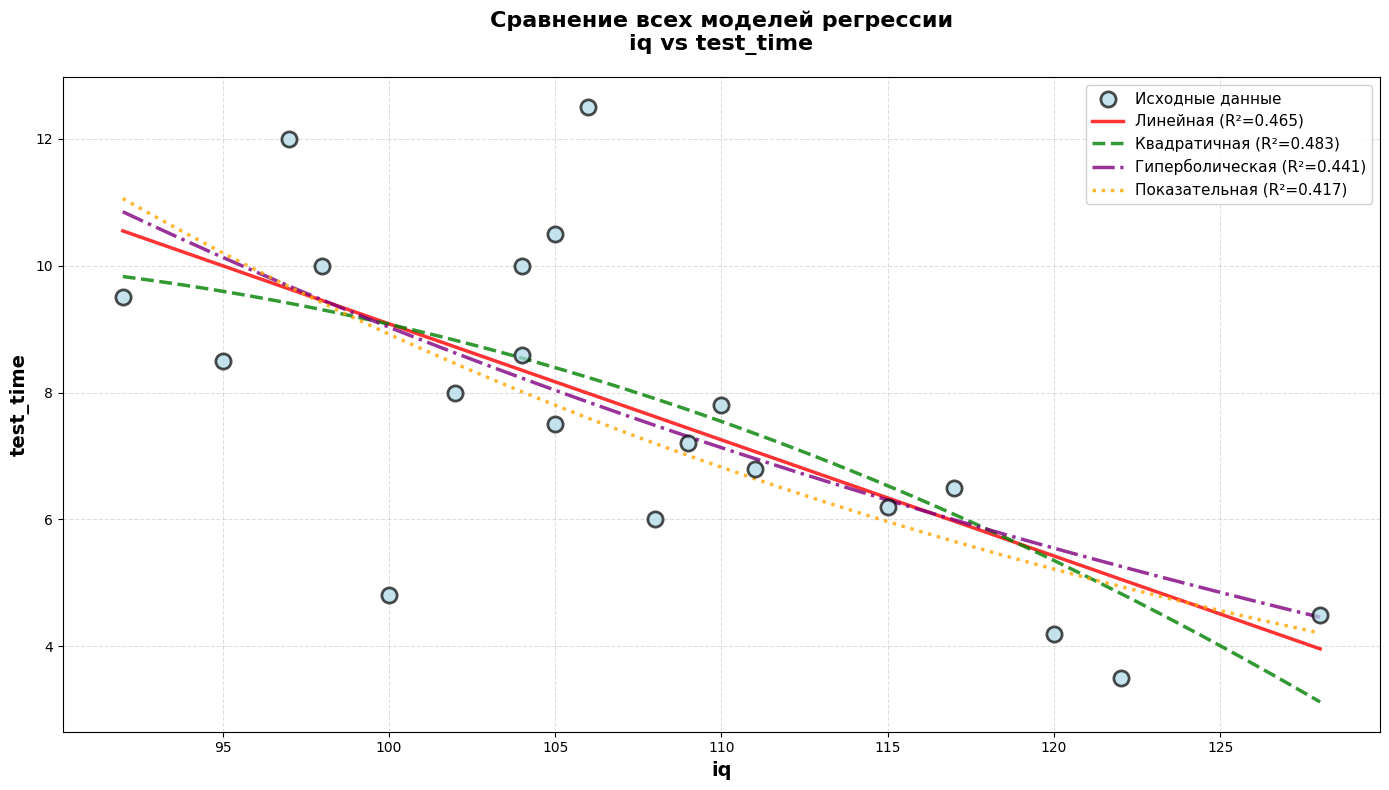

In [38]:
# Сравнение всех моделей на одном графике
fig, ax = plt.subplots(figsize=(14, 8))

# Исходные данные
ax.scatter(x, y, alpha=0.7, s=120, edgecolors='black', 
           linewidth=2, label='Исходные данные', color='lightblue', zorder=5)

# Добавляем все модели
colors = ['red', 'green', 'purple', 'orange']
linestyles = ['-', '--', '-.', ':']

for (model_name, color, linestyle) in zip(model_names, colors, linestyles):
    if results[model_name] is not None:
        result = results[model_name]
        ax.plot(x_range, result['y_range'], color=color, linewidth=2.5, 
                linestyle=linestyle, 
                label=f'{model_name} (R²={result["r2"]:.3f})', 
                alpha=0.8)

# Оформление
ax.set_xlabel(col_1.name, fontsize=14, fontweight='bold')
ax.set_ylabel(col_2.name, fontsize=14, fontweight='bold')
ax.set_title(f'Сравнение всех моделей регрессии\n{col_1.name} vs {col_2.name}', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='best', framealpha=0.9)
ax.grid(True, alpha=0.4, linestyle='--')

plt.tight_layout()
plt.show()

In [39]:
# Итоговая интерпретация результатов
print("="*70)
print("ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ РЕГРЕССИОННОГО АНАЛИЗА")
print("="*70)

# Находим лучшую и худшую модели
valid_results = {name: res for name, res in results.items() if res is not None}
sorted_models = sorted(valid_results.items(), key=lambda x: x[1]['r2'], reverse=True)

print(f"\nПроанализировано моделей: {len(valid_results)}")
print(f"Независимая переменная: {col_1.name}")
print(f"Зависимая переменная: {col_2.name}")

print("\n" + "-"*70)
print("РЕЙТИНГ МОДЕЛЕЙ (по коэффициенту детерминации R²):")
print("-"*70)

for rank, (model_name, result) in enumerate(sorted_models, 1):
    print(f"{rank}. {model_name:20s}")
    print(f"   R² = {result['r2']:.4f}  |  RMSE = {result['rmse']:.4f}  |  MAE = {result['mae']:.4f}")
    print(f"   {result['equation']}")
    print()

# Выводы
best_model = sorted_models[0]
print("-"*70)
print("ВЫВОДЫ:")
print("-"*70)

print(f"Наилучшая модель: {best_model[0]} регрессия")
print(f"   Коэффициент детерминации R² = {best_model[1]['r2']:.4f}")

if best_model[1]['r2'] > 0.7:
    quality = "высокое"
elif best_model[1]['r2'] > 0.5:
    quality = "среднее"
elif best_model[1]['r2'] > 0.3:
    quality = "низкое"
else:
    quality = "очень низкое"

print(f"   Качество модели: {quality}")
print(f"   Уравнение: {best_model[1]['equation']}")

print("\nИнтерпретация R²:")
print(f"   Модель объясняет {best_model[1]['r2']*100:.2f}% вариации зависимой переменной")

# Корреляция vs Регрессия
print("\nСвязь с корреляцией Пирсона:")
print(f"   r = {pearson_r:.4f}")
print(f"   r² = {pearson_r**2:.4f}")
print(f"   R² (линейная регрессия) = {results['Линейная']['r2']:.4f}")
print(f"   Разница: {abs(pearson_r**2 - results['Линейная']['r2']):.6f}")

print("\n" + "="*70)


ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ РЕГРЕССИОННОГО АНАЛИЗА

Проанализировано моделей: 4
Независимая переменная: iq
Зависимая переменная: test_time

----------------------------------------------------------------------
РЕЙТИНГ МОДЕЛЕЙ (по коэффициенту детерминации R²):
----------------------------------------------------------------------
1. Квадратичная        
   R² = 0.4825  |  RMSE = 1.7690  |  MAE = 1.3223
   y = -0.0033*x² + 0.5396*x + -11.8827

2. Линейная            
   R² = 0.4649  |  RMSE = 1.7989  |  MAE = 1.3269
   y = -0.1831*x + 27.3961

3. Гиперболическая     
   R² = 0.4410  |  RMSE = 1.8386  |  MAE = 1.3337
   y = 2091.8740/x + -11.8859

4. Показательная       
   R² = 0.4174  |  RMSE = 1.8769  |  MAE = 1.3798
   y = 130.8014 * 0.9735^x

----------------------------------------------------------------------
ВЫВОДЫ:
----------------------------------------------------------------------
Наилучшая модель: Квадратичная регрессия
   Коэффициент детерминации R² = 0.4825
   Качество мо

In [42]:
from scipy.stats import f

print("="*80)
print("ПРОВЕРКА ЗНАЧИМОСТИ МОДЕЛЕЙ РЕГРЕССИИ С ПОМОЩЬЮ КРИТЕРИЯ ФИШЕРА")
print("="*80)

# Параметры для анализа
alpha = 0.05  # уровень значимости
n = len(y)  # количество наблюдений

# Функция для проверки критерия Фишера
def fisher_test(model_name, y_true, y_pred, k_params):
    """
    Проверка значимости модели с помощью критерия Фишера
    
    Parameters:
    -----------
    model_name : str
        Название модели
    y_true : array
        Истинные значения
    y_pred : array
        Предсказанные значения
    k_params : int
        Количество параметров модели (без свободного члена)
    """
    print(f"\n{'='*80}")
    print(f"МОДЕЛЬ: {model_name}")
    print(f"{'='*80}")
    
    # Вычисляем суммы квадратов
    y_mean = np.mean(y_true)
    
    # Общая сумма квадратов (Total Sum of Squares)
    TSS = np.sum((y_true - y_mean)**2)
    
    # Остаточная сумма квадратов (Residual/Error Sum of Squares)
    RSS = np.sum((y_true - y_pred.flatten())**2)
    
    # Объясненная сумма квадратов (Explained Sum of Squares)
    ESS = TSS - RSS
    
    # Степени свободы
    df_regression = k_params  # степени свободы регрессии
    df_residual = n - k_params - 1  # степени свободы остатков
    
    # Средние квадраты
    MS_regression = ESS / df_regression
    MS_residual = RSS / df_residual
    
    # F-статистика
    F_statistic = MS_regression / MS_residual
    
    # Критическое значение F
    F_critical = f.ppf(1 - alpha, df_regression, df_residual)
    
    # P-значение
    p_value = 1 - f.cdf(F_statistic, df_regression, df_residual)
    
    # Коэффициент детерминации
    R2 = ESS / TSS
    
    # Вывод результатов
    print(f"\nИСХОДНЫЕ ДАННЫЕ:")
    print(f"   Количество наблюдений (n): {n}")
    print(f"   Количество параметров модели (k): {k_params}")
    
    print(f"\nСУММЫ КВАДРАТОВ:")
    print(f"   Общая сумма квадратов (TSS):      {TSS:.4f}")
    print(f"   Объясненная сумма квадратов (ESS): {ESS:.4f}")
    print(f"   Остаточная сумма квадратов (RSS):  {RSS:.4f}")
    
    print(f"\nСТЕПЕНИ СВОБОДЫ:")
    print(f"   Регрессия (df₁):  {df_regression}")
    print(f"   Остатки (df₂):    {df_residual}")
    
    print(f"\nСРЕДНИЕ КВАДРАТЫ:")
    print(f"   Средний квадрат регрессии (MSR): {MS_regression:.4f}")
    print(f"   Средний квадрат остатков (MSE):  {MS_residual:.4f}")
    
    print(f"\nКРИТЕРИЙ ФИШЕРА:")
    print(f"   F-статистика (наблюдаемое):       {F_statistic:.4f}")
    print(f"   F-критическое (α={alpha}):         {F_critical:.4f}")
    print(f"   P-значение:                        {p_value:.6f}")
    print(f"   Коэффициент детерминации (R²):     {R2:.4f}")
    
    print(f"\n{'─'*80}")
    print(f"ПРОВЕРКА ГИПОТЕЗ:")
    print(f"{'─'*80}")
    print(f"H₀: Модель незначима (все коэффициенты равны 0)")
    print(f"H₁: Модель значима (хотя бы один коэффициент ≠ 0)")
    print(f"\nУровень значимости: α = {alpha}")
    
    print(f"\n{'─'*80}")
    print(f"РЕШАЮЩЕЕ ПРАВИЛО:")
    print(f"{'─'*80}")
    print(f"Если F_наблюдаемое > F_критическое → отвергаем H₀")
    print(f"Если P-значение < α → отвергаем H₀")
    
    print(f"\n{'─'*80}")
    print(f"ВЫВОД:")
    print(f"{'─'*80}")
    
    if F_statistic > F_critical or p_value < alpha:
        print(f"F_наблюдаемое ({F_statistic:.4f}) > F_критическое ({F_critical:.4f})")
        print(f"P-значение ({p_value:.6f}) < α ({alpha})")
        print(f"\nВЫВОД: Модель ЗНАЧИМА на уровне {alpha*100}%")
        print(f"   Отвергаем нулевую гипотезу H₀")
        print(f"   Модель адекватно описывает данные")
        print(f"   Регрессионное уравнение статистически значимо")
    else:
        print(f"F_наблюдаемое ({F_statistic:.4f}) ≤ F_критическое ({F_critical:.4f})")
        print(f"P-значение ({p_value:.6f}) ≥ α ({alpha})")
        print(f"\nВЫВОД: Модель НЕЗНАЧИМА на уровне {alpha*100}%")
        print(f"   Не отвергаем нулевую гипотезу H₀")
        print(f"   Модель не описывает данные адекватно")
        print(f"   Регрессионное уравнение статистически незначимо")
    
    print(f"\n{'='*80}\n")
    
    return {
        'F_statistic': F_statistic,
        'F_critical': F_critical,
        'p_value': p_value,
        'R2': R2,
        'is_significant': F_statistic > F_critical
    }

# ============================================================================
# 1. КВАДРАТИЧНАЯ РЕГРЕССИЯ
# ============================================================================
quadratic_result = fisher_test(
    model_name="Квадратичная регрессия (y = w₂x² + w₁x + w₀)",
    y_true=y,
    y_pred=results['Квадратичная']['y_pred'],
    k_params=2  # два параметра: w₁ и w₂ (w₀ - свободный член не считается)
)

# ============================================================================
# 2. ПОКАЗАТЕЛЬНАЯ РЕГРЕССИЯ
# ============================================================================
if results['Показательная'] is not None:
    exponential_result = fisher_test(
        model_name="Показательная регрессия (y = w₀ · w₁ˣ)",
        y_true=y,
        y_pred=results['Показательная']['y_pred'],
        k_params=1  # один параметр: w₁ (после логарифмирования)
    )
else:
    print("\nПоказательная регрессия не была построена")

# ============================================================================
# СРАВНИТЕЛЬНАЯ ТАБЛИЦА
# ============================================================================
print("="*80)
print("СРАВНИТЕЛЬНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("="*80)

comparison_data = {
    'Модель': ['Квадратичная', 'Показательная'],
    'F-статистика': [
        quadratic_result['F_statistic'],
        exponential_result['F_statistic'] if results['Показательная'] is not None else np.nan
    ],
    'F-критическое': [
        quadratic_result['F_critical'],
        exponential_result['F_critical'] if results['Показательная'] is not None else np.nan
    ],
    'P-значение': [
        quadratic_result['p_value'],
        exponential_result['p_value'] if results['Показательная'] is not None else np.nan
    ],
    'R²': [
        quadratic_result['R2'],
        exponential_result['R2'] if results['Показательная'] is not None else np.nan
    ],
    'Значима?': [
        'Да' if quadratic_result['is_significant'] else 'Нет',
        'Да' if results['Показательная'] is not None and exponential_result['is_significant'] else 'Нет'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))
print("="*80)


ПРОВЕРКА ЗНАЧИМОСТИ МОДЕЛЕЙ РЕГРЕССИИ С ПОМОЩЬЮ КРИТЕРИЯ ФИШЕРА

МОДЕЛЬ: Квадратичная регрессия (y = w₂x² + w₁x + w₀)

ИСХОДНЫЕ ДАННЫЕ:
   Количество наблюдений (n): 20
   Количество параметров модели (k): 2

СУММЫ КВАДРАТОВ:
   Общая сумма квадратов (TSS):      120.9420
   Объясненная сумма квадратов (ESS): 58.3570
   Остаточная сумма квадратов (RSS):  62.5850

СТЕПЕНИ СВОБОДЫ:
   Регрессия (df₁):  2
   Остатки (df₂):    17

СРЕДНИЕ КВАДРАТЫ:
   Средний квадрат регрессии (MSR): 29.1785
   Средний квадрат остатков (MSE):  3.6815

КРИТЕРИЙ ФИШЕРА:
   F-статистика (наблюдаемое):       7.9258
   F-критическое (α=0.05):         3.5915
   P-значение:                        0.003699
   Коэффициент детерминации (R²):     0.4825

────────────────────────────────────────────────────────────────────────────────
ПРОВЕРКА ГИПОТЕЗ:
────────────────────────────────────────────────────────────────────────────────
H₀: Модель незначима (все коэффициенты равны 0)
H₁: Модель значима (хотя бы один коэффиц